Shape of X:  (1, 2304, 2304, 3)
Shape of y:  (1, 6)


IndexError: index 1 is out of bounds for axis 0 with size 1

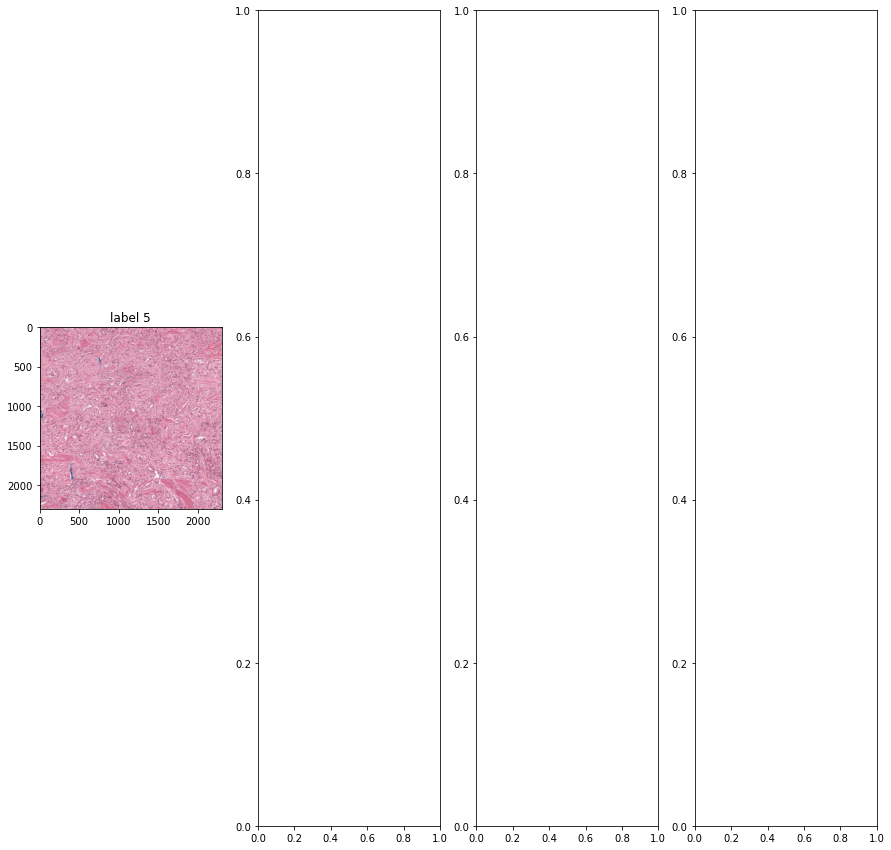

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import training_configs
import pandas as pd

import pandaGenerator


config=training_configs.efficientNetB2_config
# config=training_configs.seresnext50_config
#config=training_configs.densenet121_config
#config=training_configs.vgg16_config
df = pd.read_csv(config.train_csv)
df = df.sample(frac=1, random_state=config.seed).reset_index(drop=True)

train_datagen = pandaGenerator.PANDAGenerator(
    df=df, 
    config=config,
    mode='fit', 
    apply_tfms=False,
    shuffle=True, 
)

Xt, yt = train_datagen.__getitem__(0)

print('Shape of X: ', Xt.shape)
print('Shape of y: ', yt.shape)

fig, ax = plt.subplots(figsize=(15, 15), ncols=4)

for i in range(3):
    ax[i].imshow(Xt[i])
    ax[i].set_title('label {}'.format(np.argmax(yt[i, ])))
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import cv2
from numpy import random
import gradcam
def plot_gradcam(model,config,title):
    fig, ax = plt.subplots(figsize=(15, 10), ncols=5, nrows=2)


    for i in range(5):
        raw_image, y = train_datagen.__getitem__(random.randint(50))
        image = np.expand_dims(raw_image[0], axis=0)
        heatmap,prediction = gradcam.make_gradcam_heatmap(image, model, config.last_conv_layer_name, config.classifier_layer_names)
        superimposed_image = gradcam.create_superimposed_visualization(raw_image[0], heatmap,cv2.COLORMAP_JET)

        ax[0][i].imshow(raw_image[0])
        ax[0][i].set_title('Original - label {}'.format(np.argmax(y[0])))
        ax[1][i].imshow(superimposed_image)
        ax[1][i].set_title('GradCAM - label {}'.format(prediction))

    fig.suptitle(title)
    plt.show()

tf.Tensor([[0.58492607 0.1855434  0.06679811 0.01498052 0.1125193  0.03523261]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.58913416 0.18340306 0.06650813 0.01488614 0.11113405 0.03493442]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.58228683 0.18654506 0.06685256 0.015033   0.11380037 0.03548217]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.58493704 0.18551247 0.06681959 0.01497392 0.11252768 0.03522935]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.5887386  0.1837627  0.06649968 0.01488367 0.11118545 0.03492992]], shape=(1, 6), dtype=float32)


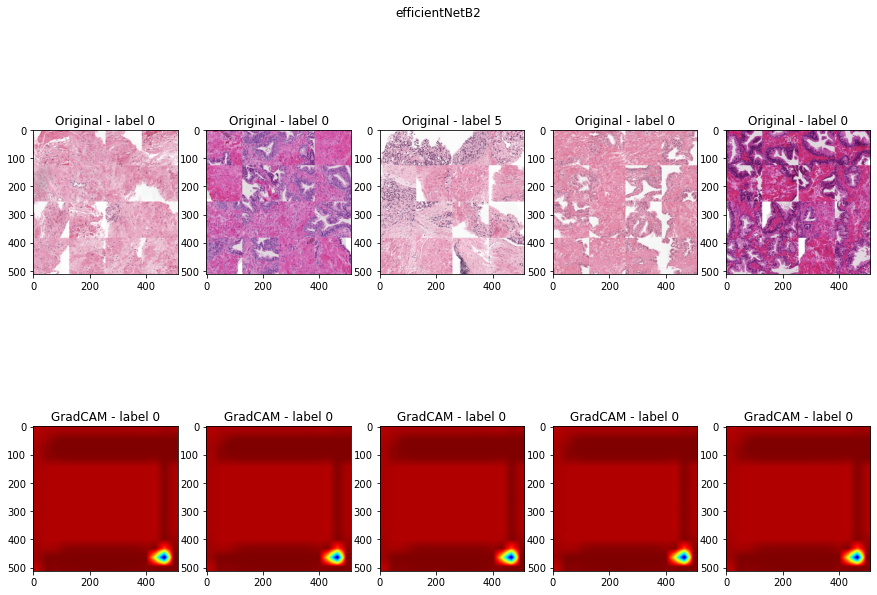

In [ ]:
import tensorflow as tf
import tensorflow_addons
config=training_configs.efficientNetB2_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}_full.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)

In [ ]:
config=training_configs.vgg16_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)

OSError: No file or directory found at modelcheckpoints/128_4_4_0/vgg16.h5

tf.Tensor([[0.21669729 0.21693346 0.19638573 0.11333977 0.12135626 0.13528751]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.14108858 0.1912215  0.16837929 0.16171499 0.15921861 0.17837702]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.21392655 0.19036914 0.12477133 0.15454131 0.12398442 0.19240718]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.2089033  0.21520005 0.19550757 0.1173427  0.12492184 0.13812448]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.21392655 0.19036914 0.12477133 0.15454131 0.12398442 0.19240718]], shape=(1, 6), dtype=float32)


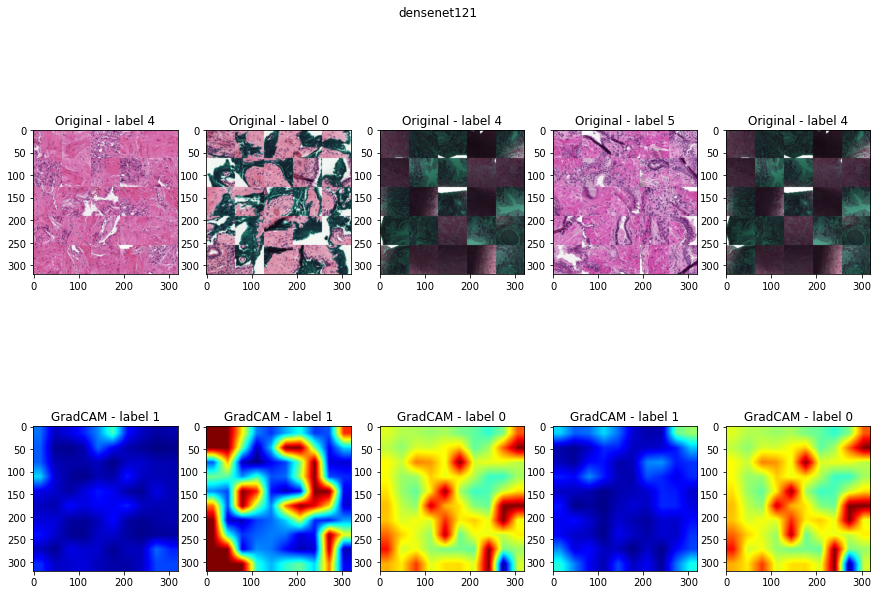

In [ ]:
config=training_configs.densenet121_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)

tf.Tensor([[0.2809639  0.26628134 0.19803928 0.10043259 0.07914902 0.07513386]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.21112682 0.2532652  0.20357646 0.13728704 0.10417273 0.09057181]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.19259495 0.24906982 0.21574208 0.13061251 0.11078516 0.10119551]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.04616261 0.07188921 0.16689499 0.17329535 0.2843513  0.2574066 ]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.13066635 0.15068832 0.23336923 0.12793063 0.19636168 0.16098377]], shape=(1, 6), dtype=float32)


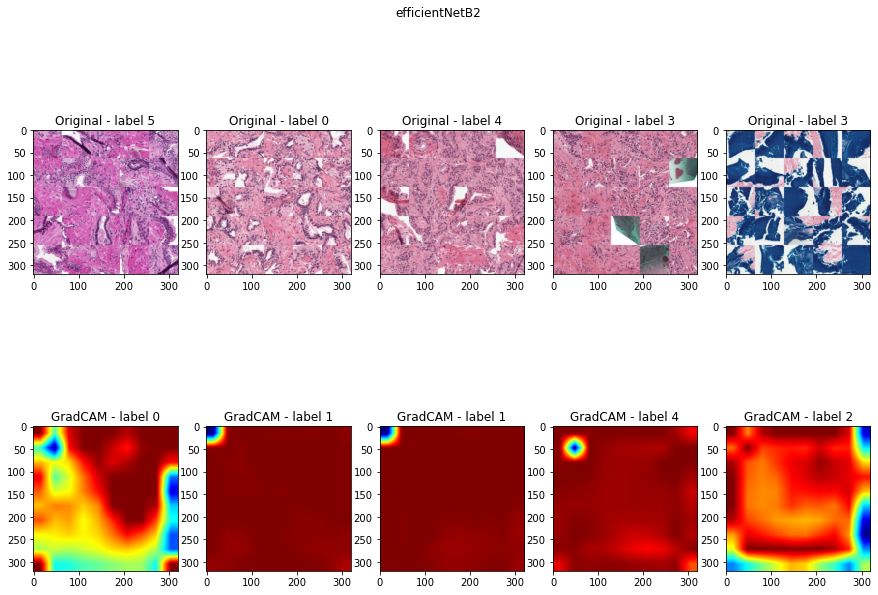

In [ ]:
config=training_configs.efficientNetB2_config
model=tf.keras.models.load_model("modelcheckpoints/{}/{}.h5".format(config.train_data_name,config.model_name))
plot_gradcam(model,config,config.model_name)